In [1]:
# PP test and KPSS test



In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from arch.unitroot import PhillipsPerron, KPSS, ADF


In [3]:
# Download data
data = yf.download('AAPL', start='2010-01-01', end='2020-01-01')
data = data['Adj Close']

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

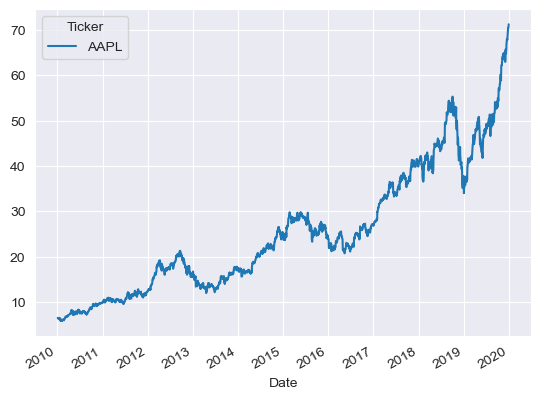

In [4]:
# Plot the data
data.plot()

In [5]:
# PP test
pp = PhillipsPerron(data, trend='c')

print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                  1.718
P-value                         0.998
Lags                               27
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [9]:
# KPSS test

kpss = KPSS(data, trend='c')

print(kpss.summary().as_text())



    KPSS Stationarity Test Results   
Test Statistic                  7.251
P-value                         0.000
Lags                               30
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [44]:
def root_analysis(data):
    models = ['n', 'c', 'ct']
    rows = []
    
    for model in models:
        try:
            adf = ADF(data, method='aic', trend=model)
            pp = PhillipsPerron(data, test_type='tau', trend=model)
            kpss = KPSS(data, trend=model)

            # Satırları rows listesine ekleyin
            rows.append({
                'Test name': adf._test_name,
                'kind of': adf.trend,
                'Lag': adf.lags,
                'Test stat': adf.stat,
                'P value': adf.pvalue,
                'H-null': adf.null_hypothesis
            })
            rows.append({
                'Test name': pp._test_name,
                'kind of': pp.trend,
                'Lag': pp.lags,
                'Test stat': pp.stat,
                'P value': pp.pvalue,
                'H-null': pp.null_hypothesis
            })
            rows.append({
                'Test name': kpss._test_name,
                'kind of': kpss.trend,
                'Lag': kpss.lags,
                'Test stat': kpss.stat,
                'P value': kpss.pvalue,
                'H-null': kpss.null_hypothesis
            })
        except ValueError:
            # Hata durumunda sadece ADF ve PhillipsPerron testlerini çalıştır
            adf = ADF(data, method='aic', trend=model)
            pp = PhillipsPerron(data, test_type='tau', trend=model)
            
            rows.append({
                'Test name': adf._test_name,
                'kind of': adf.trend,
                'Lag': adf.lags,
                'Test stat': adf.stat,
                'P value': adf.pvalue,
                'H-null': adf.null_hypothesis
            })
            rows.append({
                'Test name': pp._test_name,
                'kind of': pp.trend,
                'Lag': pp.lags,
                'Test stat': pp.stat,
                'P value': pp.pvalue,
                'H-null': pp.null_hypothesis
            })

    # Tüm satırları içeren DataFrame oluşturun
    df = pd.DataFrame(rows)

    return df


In [45]:
root_analysis(data)

,Test name,kind of,Lag,Test stat,P value,H-null
0,Augmented Dickey-Fuller,n,17,2.817381,0.999516,The process contains a unit root.
1,Phillips-Perron Test,n,27,3.148205,0.999916,The process contains a unit root.
2,Augmented Dickey-Fuller,c,17,1.493139,0.997499,The process contains a unit root.
3,Phillips-Perron Test,c,27,1.717956,0.998172,The process contains a unit root.
4,KPSS Stationarity Test,c,30,7.250504,0.000100,The process is weakly stationary.
5,Augmented Dickey-Fuller,ct,17,-0.484756,0.984020,The process contains a unit root.
6,Phillips-Perron Test,ct,27,-0.302232,0.989466,The process contains a unit root.
7,KPSS Stationarity Test,ct,30,0.953601,0.000100,The process is weakly stationary.


,Test name,kind of,Lag,Test stat,P value,H-null
0,Augmented Dickey-Fuller,n,0,2.762653,0.999375,The process contains a unit root.
1,Phillips-Perron Test,n,27,2.718908,0.999239,The process contains a unit root.
2,Augmented Dickey-Fuller,c,0,-0.721552,0.841088,The process contains a unit root.
3,Phillips-Perron Test,c,27,-0.731085,0.838533,The process contains a unit root.
4,KPSS Stationarity Test,c,30,7.560865,0.000100,The process is weakly stationary.
5,Augmented Dickey-Fuller,ct,0,-2.678660,0.245049,The process contains a unit root.
6,Phillips-Perron Test,ct,27,-2.796450,0.198251,The process contains a unit root.
7,KPSS Stationarity Test,ct,30,0.287341,0.002165,The process is weakly stationary.


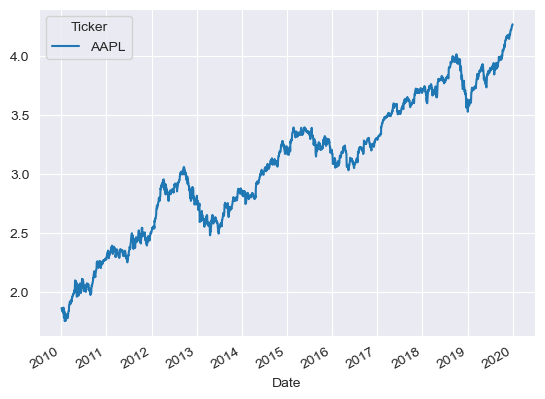

In [59]:
# plt Log transformation with original data 
data_log = np.log(data)
data_log.plot()

root_analysis(data_log)











,Test name,kind of,Lag,Test stat,P value,H-null
0,Augmented Dickey-Fuller,n,27,-7.291708,1.336947e-11,The process contains a unit root.
1,Phillips-Perron Test,n,27,-49.884285,0.000000e+00,The process contains a unit root.
2,Augmented Dickey-Fuller,c,27,-7.604077,2.347407e-11,The process contains a unit root.
3,Phillips-Perron Test,c,27,-49.837561,0.000000e+00,The process contains a unit root.
4,KPSS Stationarity Test,c,4,0.499444,3.996849e-02,The process is weakly stationary.
5,Augmented Dickey-Fuller,ct,27,-7.772309,2.400517e-10,The process contains a unit root.
6,Phillips-Perron Test,ct,27,-49.832984,0.000000e+00,The process contains a unit root.
7,KPSS Stationarity Test,ct,3,0.116030,1.088371e-01,The process is weakly stationary.


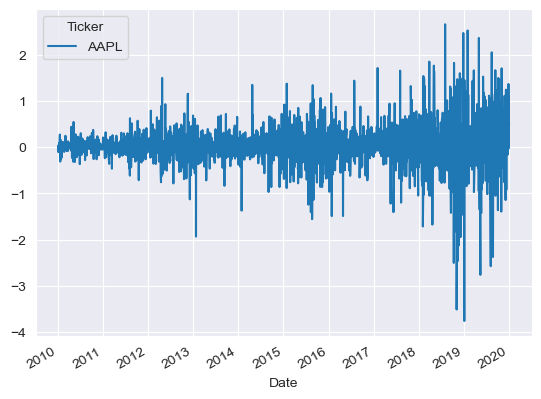

In [61]:
# plt First difference with original data
data_diff = data.diff().dropna()
data_diff.plot()

root_analysis(data_diff)



,Test name,kind of,Lag,Test stat,P value,H-null
0,Augmented Dickey-Fuller,n,13,-12.502438,8.223938e-23,The process contains a unit root.
1,Phillips-Perron Test,n,27,-49.196716,0.000000e+00,The process contains a unit root.
2,Augmented Dickey-Fuller,c,13,-12.852333,5.320144e-24,The process contains a unit root.
3,Phillips-Perron Test,c,27,-49.282541,0.000000e+00,The process contains a unit root.
4,KPSS Stationarity Test,c,6,0.063467,7.930540e-01,The process is weakly stationary.
5,Augmented Dickey-Fuller,ct,13,-12.850729,2.128773e-20,The process contains a unit root.
6,Phillips-Perron Test,ct,27,-49.272682,0.000000e+00,The process contains a unit root.
7,KPSS Stationarity Test,ct,6,0.063300,4.124114e-01,The process is weakly stationary.


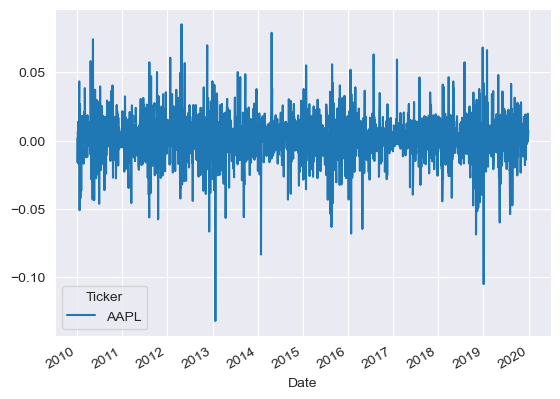

In [63]:
# plt First difference with log data
data_log_diff = data_log.diff().dropna()
data_log_diff.plot()

root_analysis(data_log_diff)
